# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
study_data_complete["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = study_data_complete[study_data_complete[['Mouse ID', 'Timepoint']].duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = duplicate_mice_df['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_all_data = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mice.tolist())]
duplicate_mice_all_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_unique = study_data_complete[~study_data_complete['Mouse ID'].isin(duplicate_mice.tolist())]
study_data_unique.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
study_data_unique["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean_by_regimen = study_data_unique.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median_by_regimen = study_data_unique.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_var_by_regimen = study_data_unique.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_std_by_regimen = study_data_unique.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem_by_regimen = study_data_unique.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
regimen_summary_stats_data = {
    "mean": tumor_mean_by_regimen,
    "median": tumor_median_by_regimen,
    "var": tumor_var_by_regimen,
    "std": tumor_std_by_regimen,
    "sem": tumor_sem_by_regimen
}
regimen_summary_stats = pd.DataFrame(regimen_summary_stats_data)
regimen_summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_data_by_regimen = study_data_unique.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
tumor_data_by_regimen


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

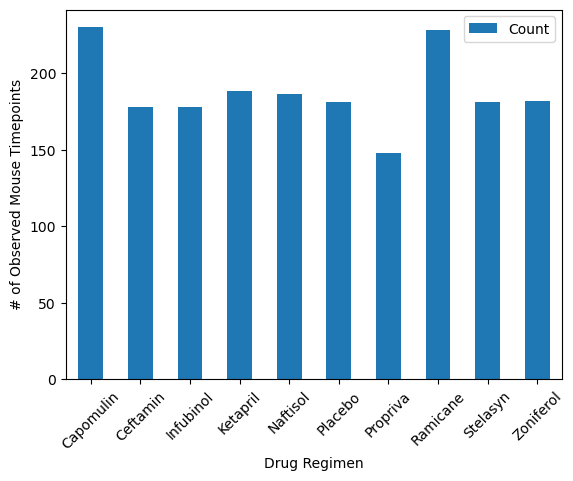

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
per_regimen_count = study_data_unique.groupby('Drug Regimen')['Mouse ID'].count()
tumor_data_by_regimen['Count'] = per_regimen_count
tumor_data_by_regimen
regimen_counts_plot = tumor_data_by_regimen.plot.bar (y='Count', rot=45, ylabel='# of Observed Mouse Timepoints')

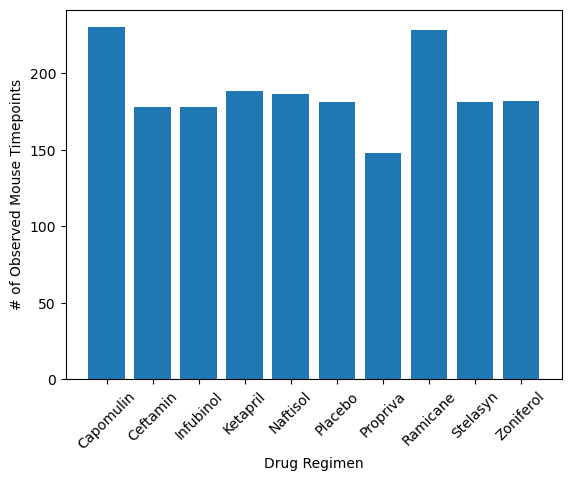

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(tumor_data_by_regimen.index, tumor_data_by_regimen['Count'])
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

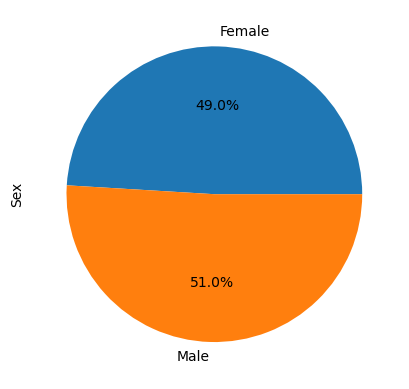

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_male_count = study_data_unique.groupby('Sex')['Sex'].count()
female_male_count
female_male_plot = female_male_count.plot.pie(y='sex', autopct='%1.1f%%')


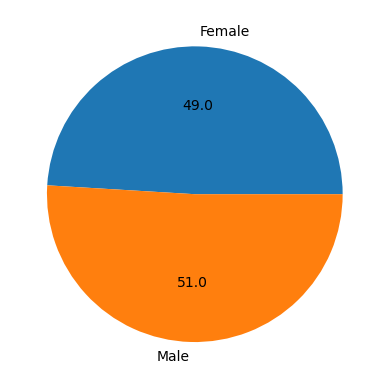

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_male_count
female_male_fig = plt.figure()
plt.pie(
    female_male_count.tolist(),
    labels=female_male_count.index.tolist(),
    autopct='%.1f'
)
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_per_mouse = study_data_unique.groupby('Mouse ID')['Timepoint'].max()

# Assemble the resulting series into a single summary DataFrame
max_timepoint_data = {
    "Mouse ID": max_timepoint_per_mouse.index.tolist(),
    "Timepoint": max_timepoint_per_mouse.tolist()
}
max_timepoint_df = pd.DataFrame(max_timepoint_data)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_volume = max_timepoint_df.merge(study_data_unique, how = 'left', on = ['Mouse ID', 'Timepoint'])
last_tumor_volume.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    last_tumor_volume_by_drug = last_tumor_volume[last_tumor_volume['Drug Regimen'] == drug]
    
    # add subset 
    tumor_volume_data.append(last_tumor_volume_by_drug["Tumor Volume (mm3)"].tolist())
    
    # Determine outliers using upper and lower bounds
    # first calculate IQR
    Q1 = last_tumor_volume_by_drug['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = last_tumor_volume_by_drug['Tumor Volume (mm3)'].quantile(0.75)
    IQR = Q3 - Q1

    #calculate upper and lower bounds
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR

    #determine the outliers
    outliers = last_tumor_volume_by_drug[last_tumor_volume_by_drug["Tumor Volume (mm3)"] < lower_bound]
    outliers = outliers["Tumor Volume (mm3)"]
    print(drug, "'s Potential Outliers:", outliers)

Capomulin 's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane 's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 's Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin 's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


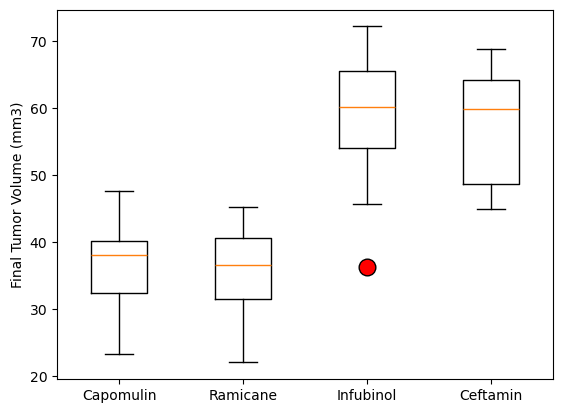

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Set the symbol properties for the outliers on the boxplot

outlier_props = dict(marker='o', markerfacecolor='red', markersize=12,
                     linestyle = 'none')

fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data, 0, flierprops=outlier_props)
plt.xticks([1,2,3,4], treatment_list)
ax.set(
    ylabel = "Final Tumor Volume (mm3)",
)
plt.show()
                     

## Line and Scatter Plots

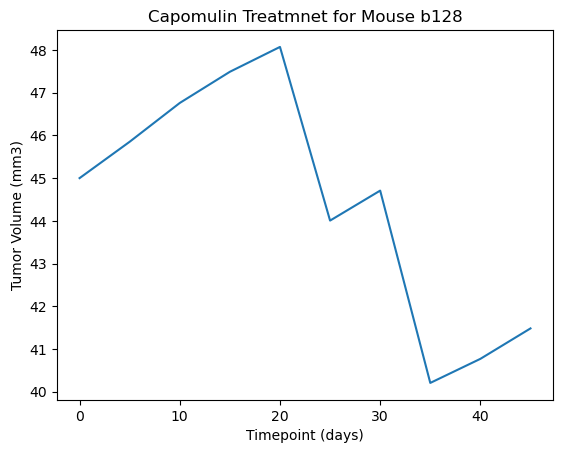

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
timepoints = study_data_unique[study_data_unique['Mouse ID'] == 'l509']["Timepoint"].tolist()
tumor_vol = study_data_unique[study_data_unique['Mouse ID'] == 'l509']["Tumor Volume (mm3)"].tolist()
timepoints

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.plot(timepoints, tumor_vol)
plt.title("Capomulin Treatmnet for Mouse b128")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

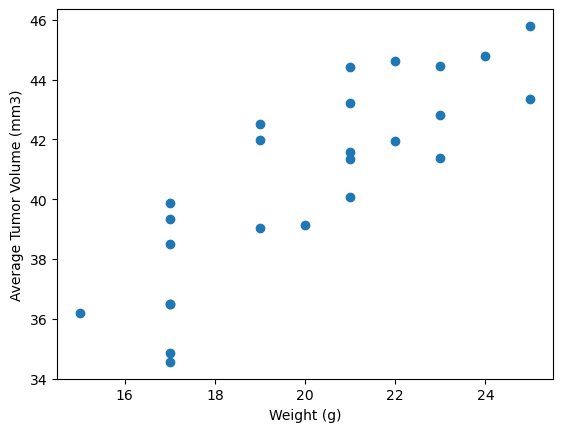

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = study_data_unique[study_data_unique['Drug Regimen'] == 'Capomulin']

# Get weight of each mouse in study
weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].max()

# Get average tumor size of each mouse in study
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


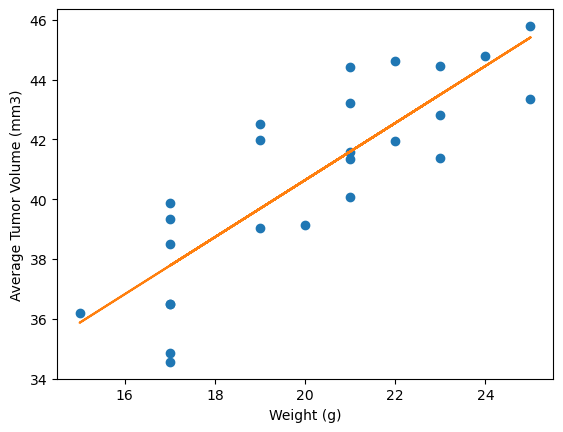

In [35]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coef = weight.corr(avg_tumor_vol)
print("The correlation between mouse weight and the average tumor volume is", "%.2f" % corr_coef)

plt.plot(weight, avg_tumor_vol, 'o')

# Create the linear regression plot on top of the scatterplot
m, b = np.polyfit(weight, avg_tumor_vol, 1)
plt.plot(weight, m*weight + b)
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
